In [2]:
##First thing first, importation of libraries that have already been installed using the conda install or pip install
import pandas as pd #the library responsible for importing our data and arranging it to a dataframe
import numpy as np #numpy is responsible for complex mathematics mulitplications that seem tedious or imposible with just python
import matplotlib.pyplot as plt #matplot is our visualization library
import seaborn as sns #seaborn is also a visualization library built upon matplot, i love seaborn!
%matplotlib inline #to print a figure in python, it will open another tab or a second form but with this, it prints it below as output and works with only jupyter, for other IDE like pycharm, you will need to say plt.show()


UsageError: unrecognized arguments: #to print a figure in python, it will open another tab or a second form but with this, it prints it below as output and works with only jupyter, for other IDE like pycharm, you will need to say plt.show()


In [3]:
#Downloading the Data; we shall use !wget to download it from IBM Object storage
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


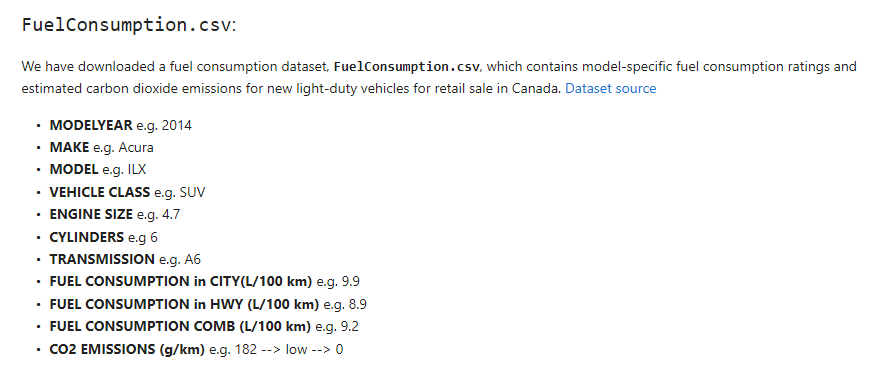

In [4]:
#Now we shall read our csv file from local, although pandas has this great amazing feature that you can just read a csv file from the net or an HTML Page
dataframe = pd.read_csv("FuelConsumptionCo2.csv")

In [5]:
#lets check out the head, the head show a few amount of the data.
dataframe.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
#A good principle is to check out the describe function too, although notice that columns with strings wont have a descriptive value
dataframe.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


##EDA: Exlopatory Data Analysis!! Yes!!, we shall do a quick yet intensive data analysis on this data 

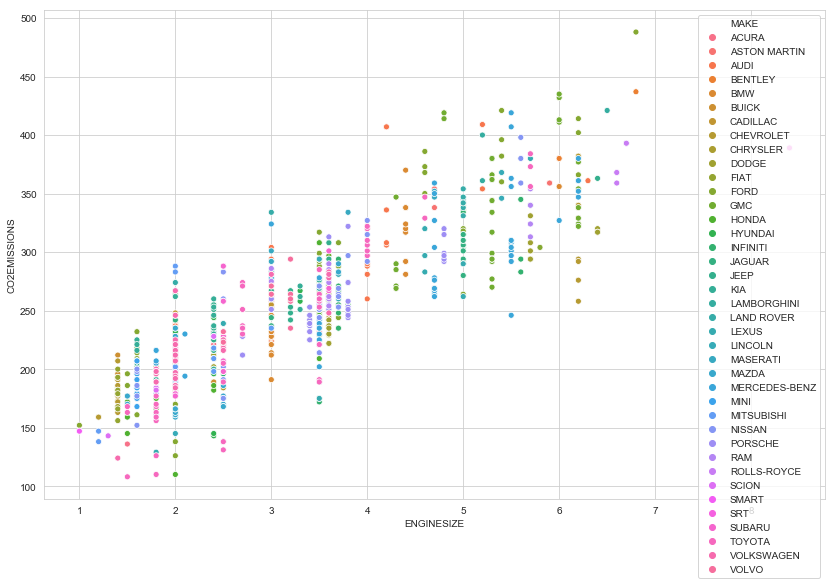

In [7]:
plt.figure(figsize=(14,9)) #setting the size of our plot
sns.set_style("whitegrid") #setting the kind of grid style
sns.scatterplot(dataframe["ENGINESIZE"], dataframe["CO2EMISSIONS"],hue=dataframe["MAKE"]) #plotting a graph defined by the car make

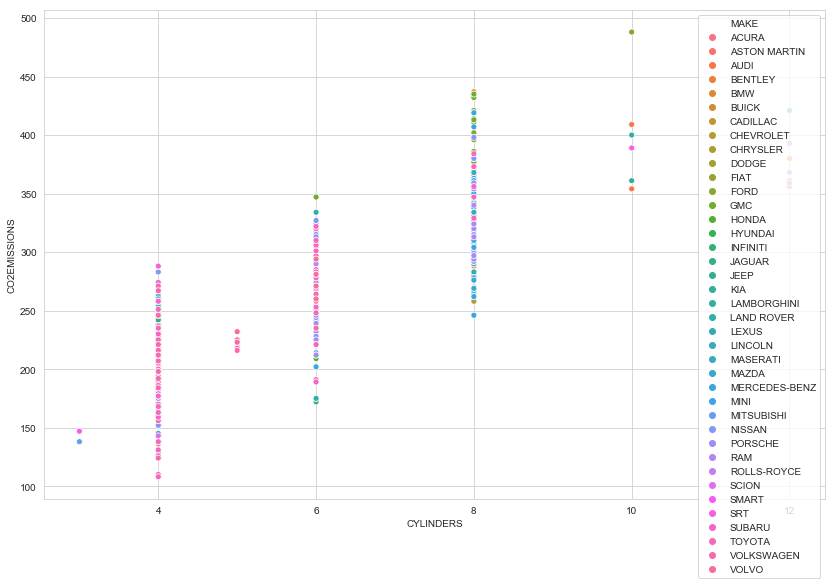

In [8]:
plt.figure(figsize=(14,9)) #setting the size of our plot
sns.set_style("whitegrid") #setting the kind of grid style
sns.scatterplot(dataframe["CYLINDERS"], dataframe["CO2EMISSIONS"],hue=dataframe["MAKE"]) #plotting a graph defined by the car make

In [46]:
from sklearn.model_selection import train_test_split #we seperate our data into train and test set 

In [97]:
X = dataframe.drop(["MODELYEAR","MAKE","MODEL","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","CYLINDERS",
                    "FUELCONSUMPTION_COMB_MPG","CO2EMISSIONS","VEHICLECLASS","TRANSMISSION","FUELTYPE"], axis=1)
y = dataframe["CO2EMISSIONS"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr = LinearRegression().fit(X_train,y_train)#we instatiate the linear model and fit it to our data

In [101]:
predictions = lr.predict(X_test)

In [102]:
print("Coefficient is ", lr.coef_); print("Intercept is ", lr.intercept_)

Coefficient is  [19.17245419  9.7822786 ]
Intercept is  79.04950738113666


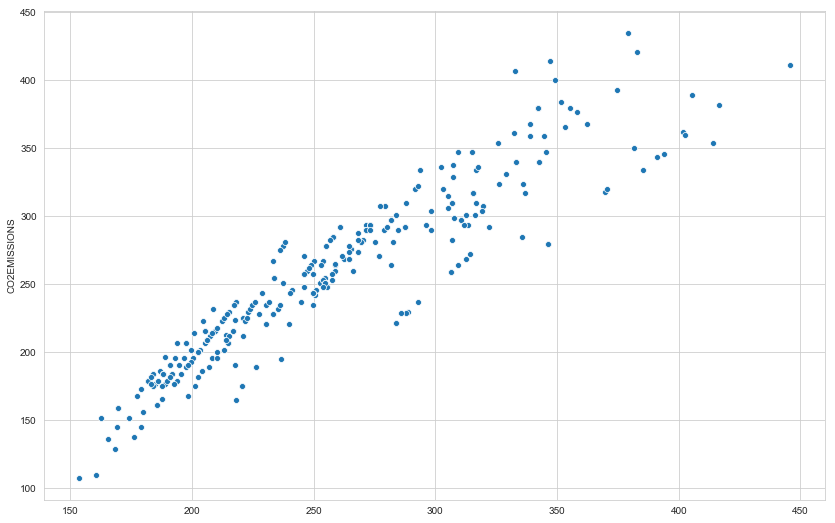

In [103]:
plt.figure(figsize=(14,9)) #setting the size of our plot
sns.set_style("whitegrid") #setting the kind of grid style
sns.scatterplot(predictions,y_test) #plotting a graph to check the results of our predictions

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


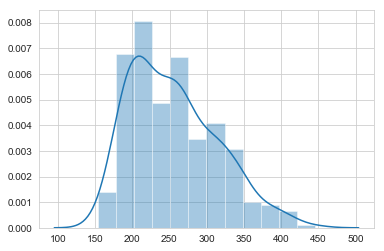

In [104]:
sns.distplot(predictions)

In [105]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print("MAE: ",mae); print("MSE:",mse); print("RMSE:",rmse)
lr.score(X,y)

MAE:  16.86504043465363
MSE: 533.2896058694515
RMSE: 23.09306402081481


0.8581704738485296

In [106]:
conclusion = pd.DataFrame(lr.coef_,X.columns,columns=["Coeff"])

In [107]:
conclusion

,Coeff
ENGINESIZE,19.172454
FUELCONSUMPTION_COMB,9.782279
